***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/nkp-network-concepts/blob/main/README.md) >

## CompTIA Network+ - Course Material 2022
### Topic: ``Network Segmentation``
***

Course material for the ``CompTIA Network+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

<a id="topAdvancedNetworking"></a>
### [Network Segmentation](#networkConcepts)

- Local Area Network <br/>
	- Physical <br/>
		- Group of Devices in the same Broadcast Domain <br/>
			- Switches (x2) <br/>
				- Broadcast Domains (x2) [Devices not aware of other Switches] <br/>
					- Segmentation via Physical Devices [No VLAN] <br/>
						- Difficult to Scale <br/>
						![Image: Devices in Same Broadcast Domain (Physical)](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/nkp/physical-segmentation.png?raw=true) <br/>
	- Logical [Segmentation within Switch] <br/>
		- Virtual LAN (VLAN) [Separated Logically] <br/>
		![Image: Devices in Same Broadcast Domain (Logical)](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/nkp/logical-segmentation.png?raw=true) <br/>
			- Configuration <br/>
				- Multiple Switches <br/>
					- Trunk [Physical Connection between Switches] <br/>
						- Transmit Multiple VLANs across Trunk <br/>
							- Standard ``802.1Q`` [``.1Q`` Trunk] <br/>
							![Image: VLAN Trunking](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/nkp/trunk.png?raw=true) <br/>
		- Ethernet Frame [Normal Frame] <br/>
			- Packet Analyser <br/>
				- Preamble [``7`` bytes] <br/>
					- ``101010...`` <br/>
				- Start Frame Delimiter (SFD) [``1`` byte] <br/>
					- ``1010101011`` <br/>
				- Destination MAC Address [``6`` bytes] <br/>
				- Source MAC Address [``6`` byte] <br/>
				- Type [EtherType] - [``2`` bytes] <br/>
				- Payload - [``46-1500`` bytes] <br/>
					- IP - TCP (or UDP) <br/>
				- Frame Check Sequence (FCS) <br/>
					- CRC - Checksum of Frame <br/>	
			- Identify Frame Source & Destination [Fit VLAN Information within Frame] <br/>
				- Add VLAN Field [Sending Information over Trunk] <br/>
					- VLAN Header [Specify Destination VLAN] <br/>
						- Packet Analyser [``12`` bits = 4094 VLANs] <br/>
						- Cisco Switches <br/>
							- Normal Range [``1`` to ``1005``] <br/>
							- Extended Range [``1006`` to ``4094``] <br/>
						- Other Switches [``1`` to ``4094``] <br/>
						- Reserved VLAN Numbers [``0`` & ``4095``] <br/>
							- Cannot Specify as separate VLANs on Switch <br/>
			- Trunking Process <br/>
				- Information sent to the ``.1Q`` Interface <br/>
					- Add VLAN Information to the Frame <br/>
						- Sent across Trunk <br/>
				- Other Side VLAN Tag taken out of Frame <br/>
					- Sent to appropriate VLAN <br/>
			- Trunk [No Longer Used]  <br/>
				- Inter-Switch Link (ISL) <br/>

<hr width=50%;>

< [Table of Contents](#top) | [References](#references) >
<a id="networkConcepts"></a>
***
### Network Segmentation
***

< [Table of Contents](#top) | [References](#references) >
<a id="networkConceptsNetworkSegmentation"></a>
***
###### Network Segmentation
***

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Physical
***

Here's a common network configuration that involves two separate switches with two separate broadcast domains and devices - each broadcast domain have no idea that the other switch exists. 

There's no virtual LANs or VLANs involved in this configuration and there's a lot of good reasons to set up a network in this way.

The network design is very simple, because you have all of the segmentation on physical devices - it minimises the effects of broadcast because you're splitting up the network into different pieces and security is certainly improved because devices that are connected on one switch can't communicate with any of the devices that are connected on a physically separate switch. 

One of the problems with this design, however, is that it's difficult to scale when you have 100s and 1000s of different networks that all need to be separated, it's difficult to manage 1000s or 1000s of individual switches in a data centre. 

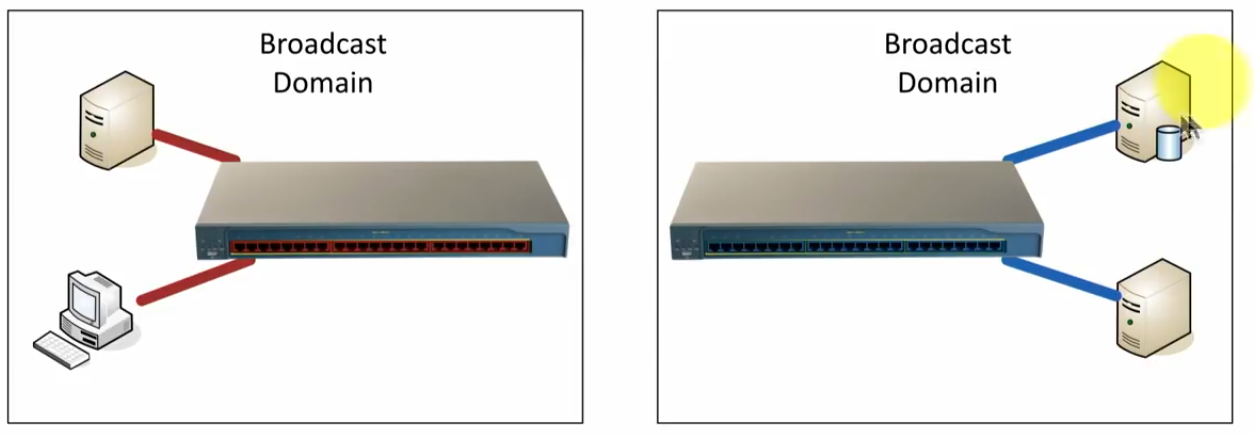

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical
***

Instead, what's commonly done is we provide the separation inside of the switch in a logical form rather than providing the separation in a physical form.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical - Virtual LAN (VLAN)
***

This is called a virtual LAN or a VLAN - we're still able to segment the network these devices are still in separate broadcast domains and these devices still can't communicate to each other because there is a logical separation between these VLANs.

 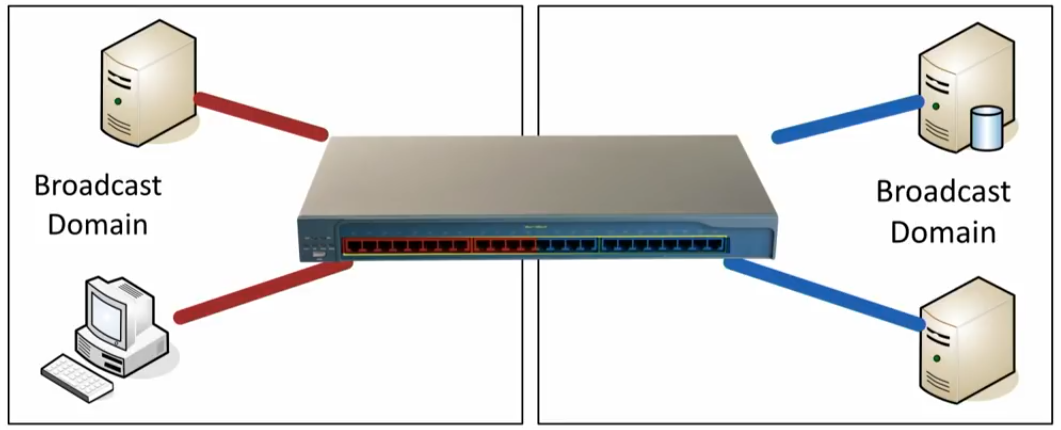

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical - Virtual LAN (VLAN) - Configuration
***

It's not uncommon to configure many different VLANs on a single physical switch - for example, we have three VLANs:

- red VLAN is the gate room 


- blue VLAN is the dialing room


- green VLAN is the infirmary

None of the devices on the red network can communicate to any of the others. 

The blue network cannot communicate to any of the other networks.

The green network is also segmented onto its own VLAN.

The only way that these VLANs could possibly communicate between each other is to route traffic between the different VLANs. 

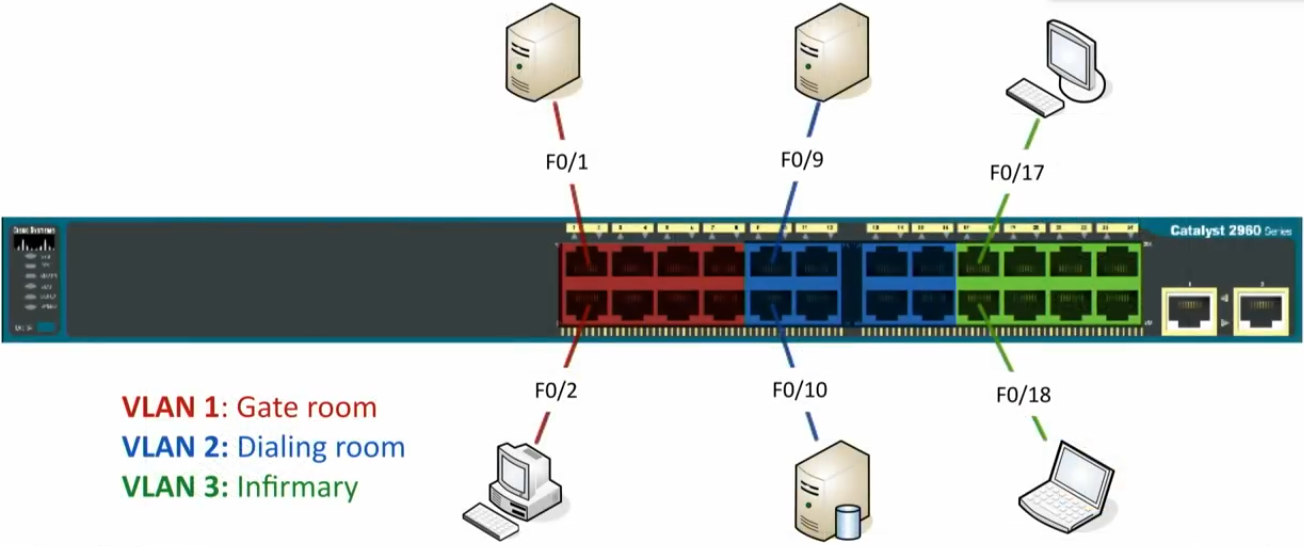

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical - Virtual LAN (VLAN) - Configuration - Multiple Switches
***

What if you were spreading these VLANs across multiple switches - you might have an Ethernet switch with a VLAN 100 and a VLAN 200 and then you might have a different physical switch, which also has the same VLAN 100 and the same VLAN 200.

One way that you could connect these VLANs to each other would be to run one cable for VLAN 100 between these two switches, and another cable for VLAN 200 between these two switches.

This obviously would not scale very well once you have a larger number of VLANs. What if there are 10 VLANs that are shared between these switches or 100 or 1000, you wouldn't even have enough interfaces on the switch to be able to connect all of those VLANs to each other. 

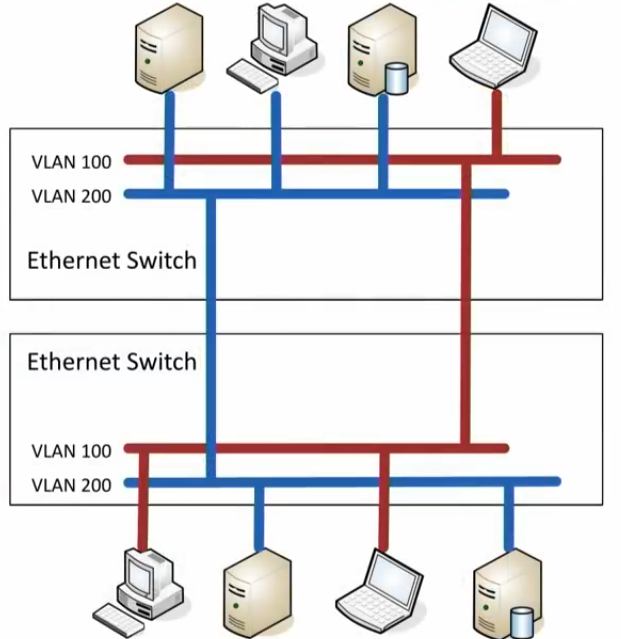

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical - Virtual LAN (VLAN) - Configuration - Trunk
***

Instead, you would create what's called a trunk - this trunk connection is a single physical connection between those two switches, but it's able to transmit multiple VLANs across that trunk.

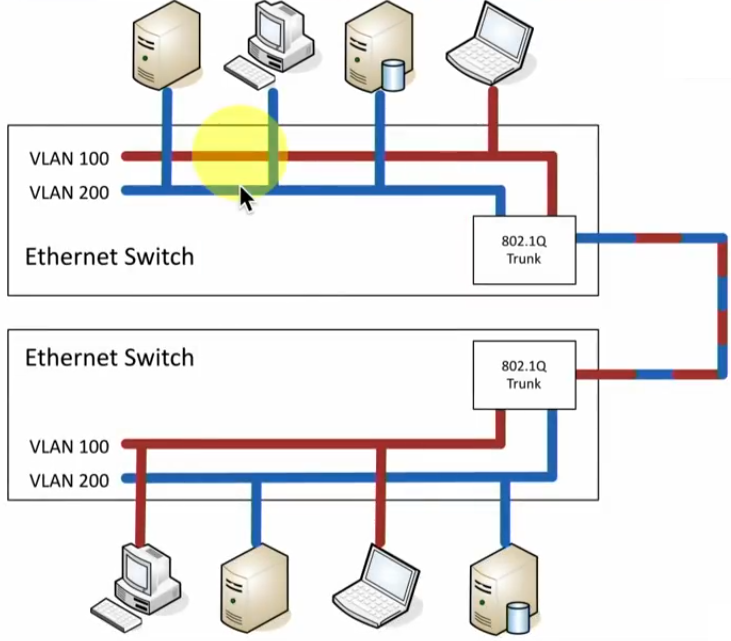

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Local Area Network - Logical - Virtual LAN (VLAN) - Configuration - Trunk - ``802.1Q``
***

The standard for trunking is called IEEE ``802.1Q``, we often refer to it in the abbreviated form as a ``.1Q`` truck. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - VLAN Header [Destination VLAN]
***

The way this trunk information works is we take a perfectly normal Ethernet frame that has a preamble and a start frame delimiter (SFD) and a couple of MAC addresses for the source and destination and then ultimately a payload inside of that frame. 

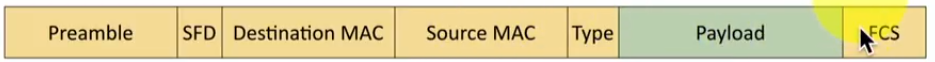

But we need to identify where this frame is coming from and where it's going to, we need to fit the VLAN information somewhere in this frame.

So when we send information over a trunk, we add an additional field called the VLAN field, that VLAN header is now going to specify what the destination VLAN will be once this particular frame gets to the other end of this trunk.

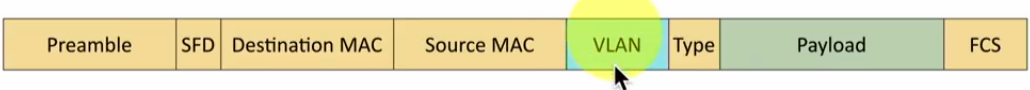

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - VLAN Header [Destination VLAN] - 12-bits [4094 VLANs]
***

If you were to grab a packet capture and look at the VLAN field, you'd see that it's 12-bits long, that gives us enough numbers to come up with 4094 possible VLANs that we can use on this particular trunk.

In [1]:
2**12

4096

Some devices like Cisco switches will separate these into a normal range of VLANs, which would be 1 through 1005 and an extended range of VLANs, which would be VLANs numbered 1006 through 4094. 

Other devices will simply use all of the numbers inclusive between 1 and 4094. 

You should also note that the very first number and the last number of this particular range, which would be 0 and 4095 are reserved VLAN numbers and you're not able to specify those as separate VLANs on your switch. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - Process
***

Let's see how this trunking process might work.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - Process - Information sent to the ``.1Q`` Interface 
***

Let's start with an Ethernet frame that's starting on this device on VLAN 200.

This device needs to communicate with the device on the other Ethernet switch so that information is sent to the ``.1Q`` interface.

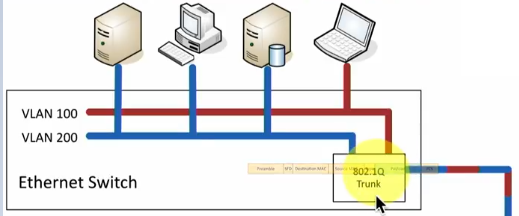

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - Process - Add VLAN Information to the Frame [Sent across Trunk]
***

At that point, the frame has the VLAN information for VLAN 200 added into the frame and it's sent across this particular trunk. 

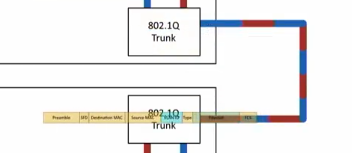

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Ethernet Frame - Process - VLAN Tag taken ouf of Frame [Sent to VLAN]
***

At the other side, that VLAN tag is taken out of the Ethernet frame, and it's put back onto the network and sent to the appropriate VLAN. 

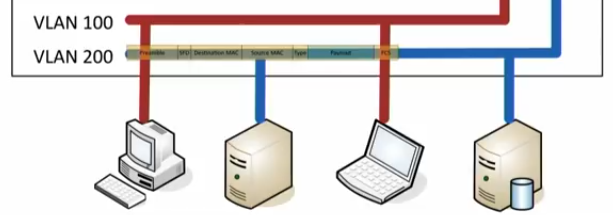

So here's a example of a well segmented network where you have multiple VLANs and all of these VLANs exist on multiple switches. 

You have a red, a blue and a green VLAN and you have devices on each of these switches that are members of those VLANs. 

These devices are able to communicate with other devices on their same VLAN by communicating across one of these ``802.1Q`` trunks.

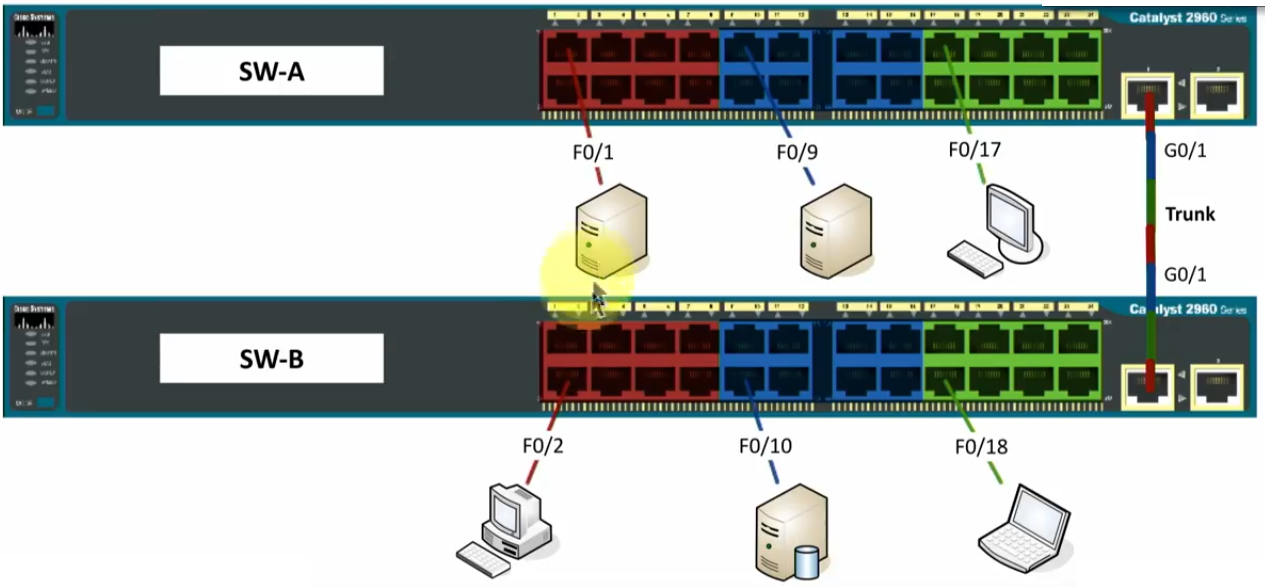

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Trunk [No Longer Used] - Inter-Switch Link (ISL)
***

You may see a much older switches and older study materials that there's a mention of a different type of trunking protocol called ``ISL`` - stands for inter-switch link.

These days ISL is no longer used and if you're doing any type of trunking in your environment, it's always going to be a ``.1Q`` trunk. 

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Network+ (N10-007) Course Notes," [professormesser.com](https://web.archive.org/web/20220404153917/https://www.professormesser.com/network-plus/n10-007/n10-007-training-course/), March 2019.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [2]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK